PROJECT 4 PROPOSAL LEVEL 1

IDEA - SENTIMENT ANALYSIS

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('Twitter_Data.csv')

In [3]:
print("Initial shape:", df.shape)
print("\nNaN values in each column:")
print(df.isnull().sum())

Initial shape: (162980, 2)

NaN values in each column:
clean_text    4
category      7
dtype: int64


In [4]:
df = df.dropna()
print("\nShape after removing NaN values:", df.shape)

stop_words = set(stopwords.words('english'))


Shape after removing NaN values: (162969, 2)


In [5]:
def clean_text(text):
    try:
        text = str(text)
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = ' '.join(words)
        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return "" 

In [6]:
print("\nCleaning text...")
df['cleaned_text'] = df['clean_text'].apply(clean_text)

df = df[df['cleaned_text'].str.strip().astype(bool)]
print("\nShape after removing empty strings:", df.shape)


Cleaning text...

Shape after removing empty strings: (162895, 3)


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['category']

print("NaN values in features:", np.isnan(X.toarray()).sum())
print("NaN values in target:", y.isnull().sum())

NaN values in features: 0
NaN values in target: 0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Training model...


In [10]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.78      0.83      7210
         0.0       0.86      0.97      0.92     11007
         1.0       0.92      0.89      0.90     14362

    accuracy                           0.89     32579
   macro avg       0.89      0.88      0.88     32579
weighted avg       0.89      0.89      0.89     32579



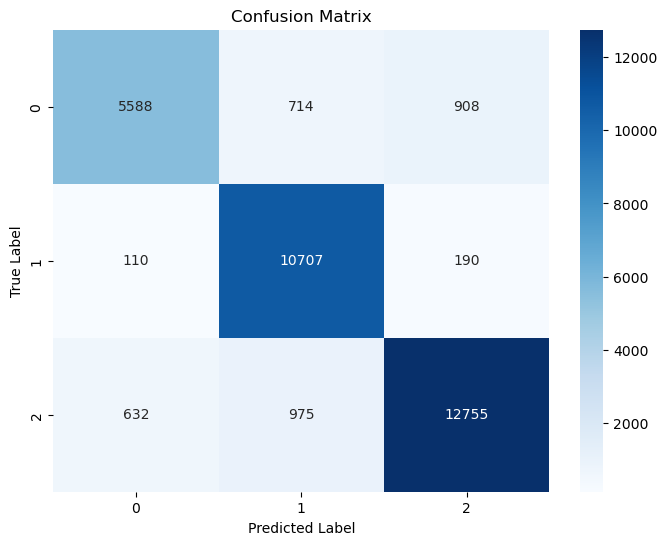

In [11]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

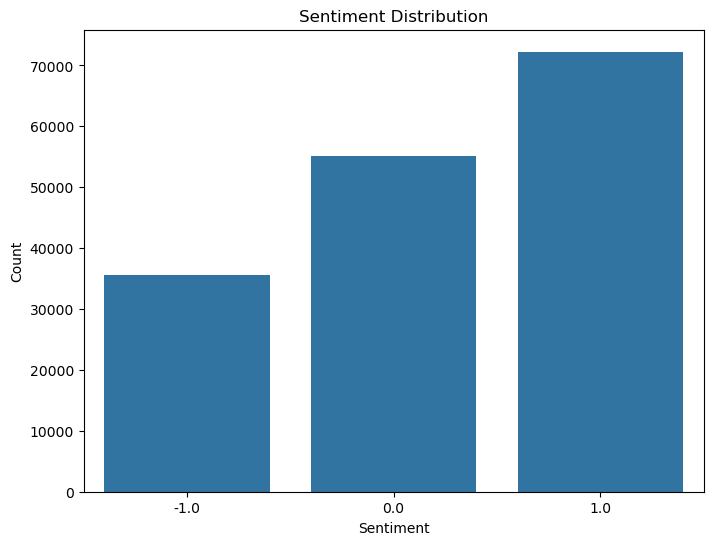

In [12]:
plt.figure(figsize=(8, 6))
sentiment_dist = df['category'].value_counts()
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

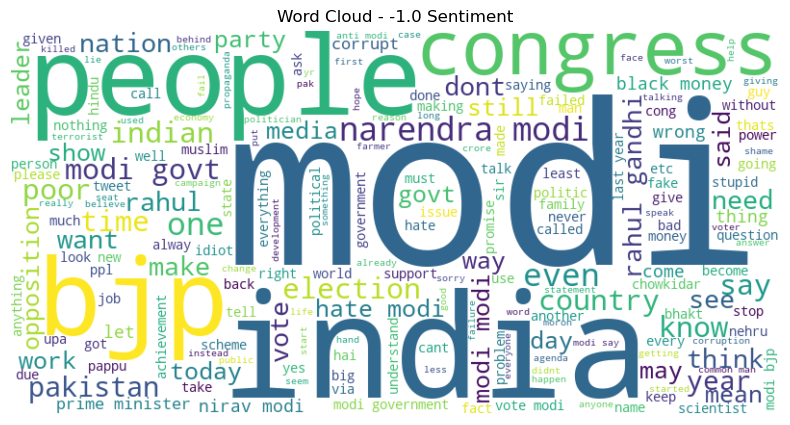

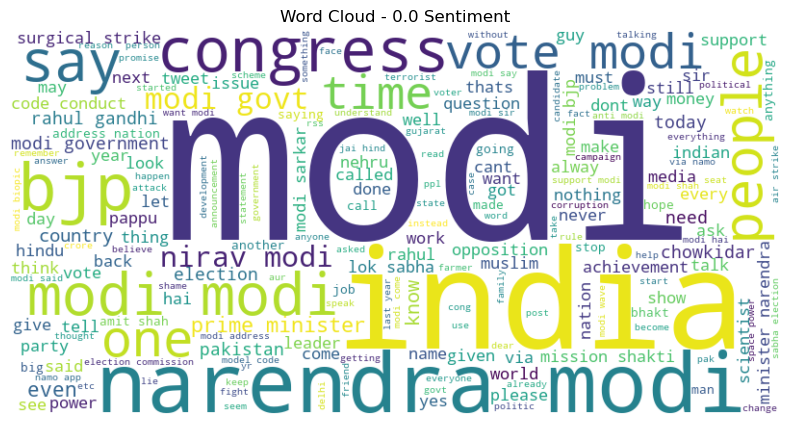

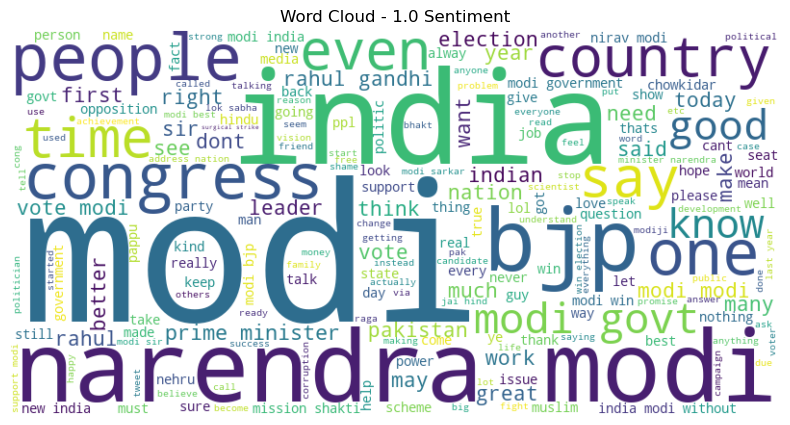

In [13]:
for sentiment in df['category'].unique():
    text = ' '.join(df[df['category'] == sentiment]['cleaned_text'])
    if text.strip(): 
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - {sentiment} Sentiment')
        plt.axis('off')
        plt.show()

In [14]:
feature_importance = pd.DataFrame({'feature': vectorizer.get_feature_names_out(),'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

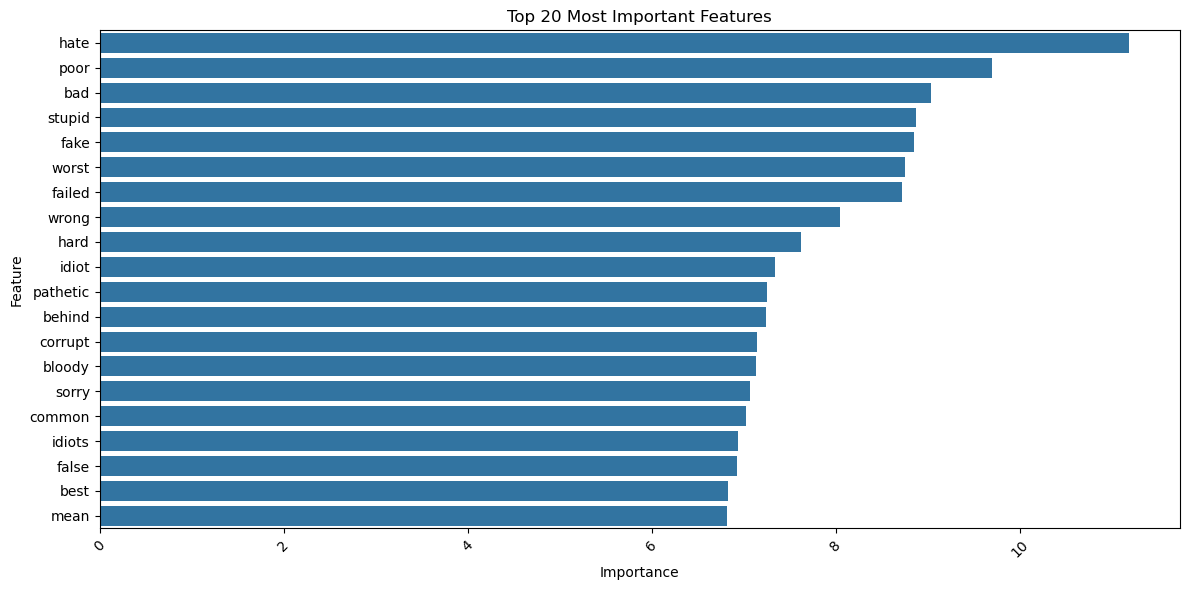

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()